### **In this Notebook we test the use of an AutoML framework PyCaret**

AutoML can be used to quickly compare and tune a variety of models, which is useful when developing the baseline approach.

In [ ]:
import pandas as pd
import seaborn as sns
import sys
sys.path.append('..')
from Cleaning_and_Evaluation import *

Read the seleted dataset.

In [ ]:
#df = pd.read_csv("../data/exosomes.raw_spectrum_400-1800.csv")
#df = pd.read_csv("../data/scaled_and_noise_removal.csv")
#pivoted_df = pd.read_csv("../data/Unscaled_Baseline_Correction.csv")
#pivoted_df = pd.read_csv("../../data/Scaled_Baseline_Correction.csv")
df = pd.read_csv("../data/current_clean_spectrum.csv")
#df = pd.read_csv("../data/scaling_test.csv")

In [ ]:
# fastRP_df = pd.read_csv("../data/fastRP_embeddings.csv")
# statuses_df = pd.read_csv("../data/SpecIDs_and_Status.csv")
# pivoted_df = fastRP_df.merge(statuses_df, on="SpecID").sort_values(by="SpecID").set_index('SpecID')

In [ ]:
df.head()

,SpecID,Seq,WaveNumber,Absorbance,SurID,Status
0,201210-1-00,0,200.00000,2.443895,201210-1,Normal
1,201210-1-00,1,200.68336,2.340851,201210-1,Normal
2,201210-1-00,2,201.36674,2.246252,201210-1,Normal
3,201210-1-00,3,202.05011,2.159808,201210-1,Normal
4,201210-1-00,4,202.73349,2.081228,201210-1,Normal


In [ ]:
sample = df[df['SpecID'] == "210526-3-15"]

<Axes: xlabel='WaveNumber', ylabel='Absorbance'>

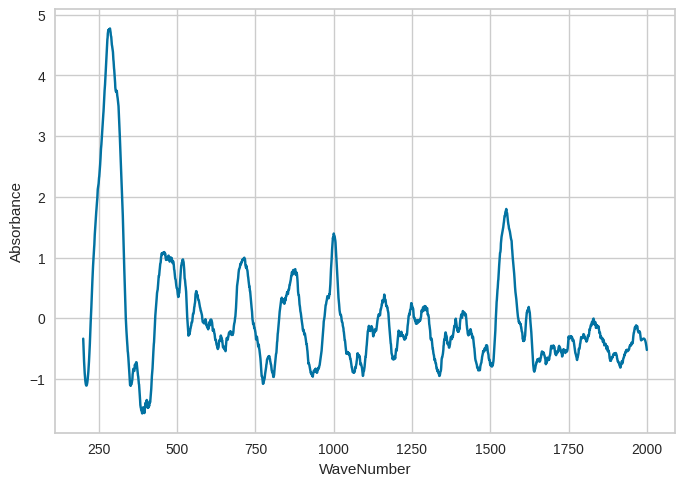

In [ ]:
sns.lineplot(x="WaveNumber", y="Absorbance", data=sample)

Pivot the Dataframe to create a column for each wavelength

In [ ]:
wavelength_df = prepare_wavelength_df(df)

In [ ]:
wavelength_df.head()

,200.0,200.68336,201.36674,202.05011,202.73349,203.41685,204.10023,204.7836,205.46696,206.15034,...,1995.2164,1995.8998,1996.5831,1997.2665,1997.9498,1998.6333,1999.3167,2000.0,SurID,Status
SpecID,,,,,,,,,,,,,,,,,,,,,
201210-1-00,2.443895,2.340851,2.246252,2.159808,2.081228,2.010222,1.946500,1.889771,1.839746,1.796132,...,-0.219738,-0.218255,-0.216545,-0.214591,-0.212375,-0.209878,-0.207084,-0.203975,201210-1,Normal
201210-1-01,2.987729,2.877140,2.771600,2.671053,2.575446,2.484723,2.398830,2.317713,2.241317,2.169588,...,0.139463,0.158756,0.178290,0.198040,0.217982,0.238089,0.258338,0.278702,201210-1,Normal
201210-1-02,1.367590,1.338989,1.309418,1.278995,1.247839,1.216070,1.183807,1.151170,1.118277,1.085248,...,0.993536,1.009665,1.021793,1.029665,1.033029,1.031629,1.025214,1.013529,201210-1,Normal
201210-1-03,4.494705,4.659871,4.799524,4.914824,5.006931,5.077004,5.126202,5.155685,5.166612,5.160143,...,-0.483049,-0.484923,-0.487230,-0.489997,-0.493249,-0.497011,-0.501307,-0.506165,201210-1,Normal
201210-1-04,1.399465,1.357917,1.318500,1.281168,1.245880,1.212592,1.181260,1.151841,1.124292,1.098568,...,-0.376922,-0.365798,-0.353721,-0.340652,-0.326552,-0.311383,-0.295106,-0.277681,201210-1,Normal


In [ ]:
wavelength_df

---

#### **PyCaret**

In [20]:
from pycaret.classification import *

Set up the PyCaret environment

In [21]:
df

,SpecID,Seq,WaveNumber,Absorbance,SurID,Status
0,201210-1-00,0,200.00000,2.443895,201210-1,Normal
1,201210-1-00,1,200.68336,2.340851,201210-1,Normal
2,201210-1-00,2,201.36674,2.246252,201210-1,Normal
3,201210-1-00,3,202.05011,2.159808,201210-1,Normal
4,201210-1-00,4,202.73349,2.081228,201210-1,Normal
...,...,...,...,...,...,...
8023570,210526-3-09,2630,1997.26650,-0.306283,210526-3,Hyperglycemia
8023571,210526-3-09,2631,1997.94980,-0.285098,210526-3,Hyperglycemia
8023572,210526-3-09,2632,1998.63330,-0.261904,210526-3,Hyperglycemia
8023573,210526-3-09,2633,1999.31670,-0.236634,210526-3,Hyperglycemia


In [22]:
caret = setup(data=wavelength_df, target='Status', session_id=1234, fold_strategy='groupkfold', fold_groups='SurID')

,Description,Value
0,Session id,1234
1,Target,Status
2,Target type,Multiclass
3,Target mapping,"Hyperglycemia: 0, Hypoglycemia: 1, Normal: 2"
4,Original data shape,"(3045, 2637)"
5,Transformed data shape,"(3045, 2637)"
6,Transformed train set shape,"(2131, 2637)"
7,Transformed test set shape,"(914, 2637)"
8,Numeric features,2635
9,Categorical features,1


Compare different machine learning models.

In [23]:
compare_models(exclude=['lightgbm', 'gbc'])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,14:27:29
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.3475,0.0000,0.3475,0.4360,0.3580,-0.0128,-0.0129,0.6470
lda,Linear Discriminant Analysis,0.3395,0.0000,0.3395,0.4567,0.3776,0.0153,0.0163,6.2150
svm,SVM - Linear Kernel,0.3382,0.0000,0.3382,0.4224,0.2940,0.0067,-0.0002,1.2990
ada,Ada Boost Classifier,0.3332,0.0000,0.3332,0.4736,0.3596,0.0227,0.0281,4.2930
lr,Logistic Regression,0.3306,0.0000,0.3306,0.4665,0.3646,0.0243,0.0268,10.6290
dt,Decision Tree Classifier,0.3268,0.0000,0.3268,0.4403,0.3582,-0.0103,-0.0113,1.3730
knn,K Neighbors Classifier,0.3256,0.0000,0.3256,0.4659,0.3584,0.0187,0.0214,0.6660
ridge,Ridge Classifier,0.3152,0.0000,0.3152,0.4613,0.3510,0.0108,0.0135,0.6710
rf,Random Forest Classifier,0.3035,0.0000,0.3035,0.4645,0.3340,0.0115,0.0162,1.4150
et,Extra Trees Classifier,0.2983,0.0000,0.2983,0.4631,0.3342,0.0115,0.0148,1.0140


Processing:   0%|          | 0/57 [00:00<?, ?it/s]

Create and Tune a model.

In [ ]:
model = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8411,0.0000,0.8411,0.8537,0.8414,0.7624,0.7678
1,0.8779,0.0000,0.8779,0.8807,0.8782,0.8168,0.8178
2,0.8451,0.0000,0.8451,0.8533,0.8467,0.7679,0.7703
3,0.8592,0.0000,0.8592,0.8636,0.8585,0.7890,0.7916
4,0.8357,0.0000,0.8357,0.8505,0.8381,0.7543,0.7591
5,0.8263,0.0000,0.8263,0.8263,0.8253,0.7387,0.7396
6,0.8732,0.0000,0.8732,0.8755,0.8737,0.8097,0.8102
7,0.8779,0.0000,0.8779,0.8815,0.8776,0.8161,0.8182
8,0.8545,0.0000,0.8545,0.8585,0.8550,0.7818,0.7831


In [ ]:
#tuned_model = tune_model(model)
tuned_model = tune_model(model, n_iter=10, search_library='optuna')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,22:44:59
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

[I 2024-03-13 22:45:00,342] Searching the best hyperparameters using 2131 samples...


KeyboardInterrupt: 

In [ ]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…